In [8]:
%pylab inline
import numpy as np
import matplotlib.pylab as plt
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
x = np.array([450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990])
y = np.array([15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43 ])

In [10]:
amostra1 = loadtxt('./controllers/walk/dados/50Matriz2p.dat')
amostra2 = loadtxt('./controllers/walk2/dados/50Matriz2p.dat')
amostra3 = loadtxt('./controllers/walk3/dados/50Matriz2p.dat')
z1 = np.mean([amostra1,amostra2,amostra3], axis=0)

In [11]:
amostra1 = loadtxt('./controllers/walk/dados/100Matriz2p.dat')
amostra2 = loadtxt('./controllers/walk2/dados/100Matriz2p.dat')
amostra3 = loadtxt('./controllers/walk3/dados/100Matriz2p.dat')
z2 = np.mean([amostra1,amostra2,amostra3], axis=0)

In [12]:
amostra1 = loadtxt('./controllers/walk/dados/200Matriz2p.dat')
amostra2 = loadtxt('./controllers/walk2/dados/200Matriz2p.dat')
amostra3 = loadtxt('./controllers/walk3/dados/200Matriz2p.dat')
z3 = np.mean([amostra1,amostra2,amostra3], axis=0)
z3.max()

156.49433333333332

In [13]:
amostra1 = loadtxt('./controllers/walk/dados/300Matriz2p.dat')
amostra2 = loadtxt('./controllers/walk2/dados/300Matriz2p.dat')
amostra3 = loadtxt('./controllers/walk3/dados/300Matriz2p.dat')
z4 = np.mean([amostra1,amostra2,amostra3], axis=0)
z4.max()

158.50199999999998

TypeError: Length of x must be number of columns in z.

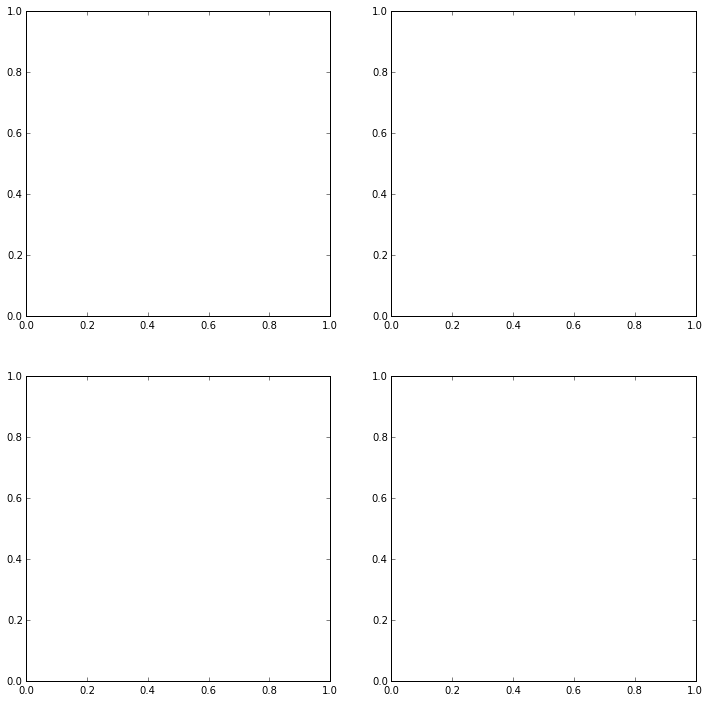

In [14]:
origin = 'lower'
fig, axs = plt.subplots(2,2, figsize=(12, 12))
# fig = plt.figure(figsize=(12, 12)) 

plt.subplot(2, 2, 1)
plt.contourf(x, y, z1, 10, cmap=plt.cm.bone, origin=origin)
plt.contour(x, y, z1)
plt.title('50000 passos')
plt.xlabel('Periodo do Passo')
plt.ylabel('Balanco Lateral')

plt.subplot(2, 2, 2)
plt.contourf(x, y, z2, 10, cmap=plt.cm.bone, origin=origin)
plt.contour(x, y, z2)
plt.title('100000 passos')
plt.xlabel('Periodo do Passo')
plt.ylabel('Balanco Lateral')

plt.subplot(2, 2, 3)
plt.contourf(x, y, z3, 10, cmap=plt.cm.bone, origin=origin)
plt.contour(x, y, z3)
plt.title('200000 passos')
plt.xlabel('Periodo do Passo')
plt.ylabel('Balanco Lateral')

plt.subplot(2, 2, 4)
plt.contourf(x, y, z4, 10, cmap=plt.cm.bone, origin=origin)
plt.contour(x, y, z4)
plt.title('300000 passos')
plt.xlabel('Periodo do Passo')
plt.ylabel('Balanco Lateral')

plt.savefig('./grafico300.svg')

In [8]:
amostra1 = loadtxt('./controllers/walk/dados/Episodio.dat')
amostra2 = loadtxt('./controllers/walk2/dados/Episodio.dat')
amostra3 = loadtxt('./controllers/walk3/dados/Episodio.dat')
a = len(amostra1)
b = len(amostra2)
c = len(amostra3)
d = np.array([a, b, c])
print(np.min(d))
amostra4 = np.array([range(0, np.min(d)),range(0, np.min(d))])
amostra4 = amostra4.T

9071


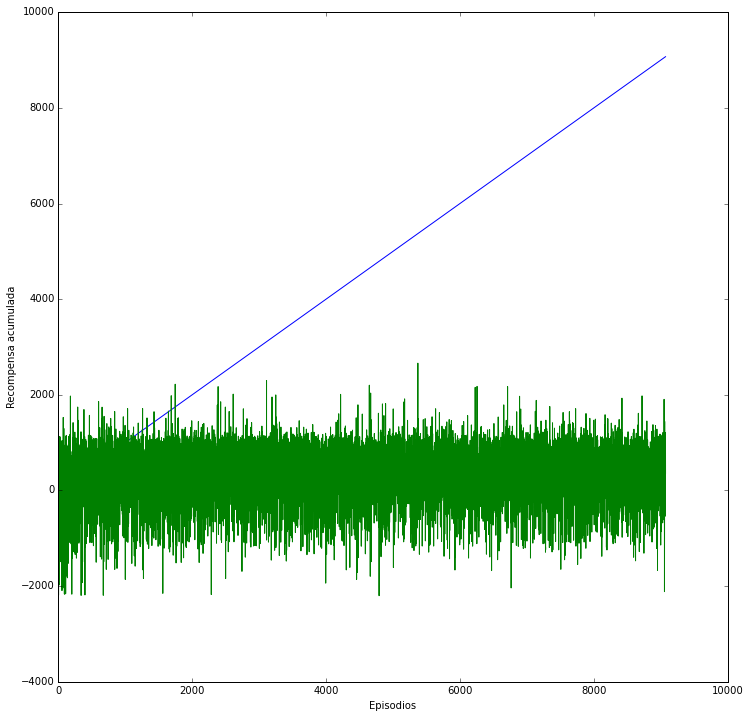

In [9]:
for x in range(min(d)):
    amostra4[x][1] = (amostra1[x][1] + amostra2[x][1] + amostra3[x][1])/3
    #print(amostra1[x][1])
plt.figure(figsize=(12, 12)) 
plt.plot(range(0, min(d)) ,amostra4)
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
#plt.savefig('./episodio300.svg')

In [10]:
def movingaverage(interval, window_size):
    window= numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

2662


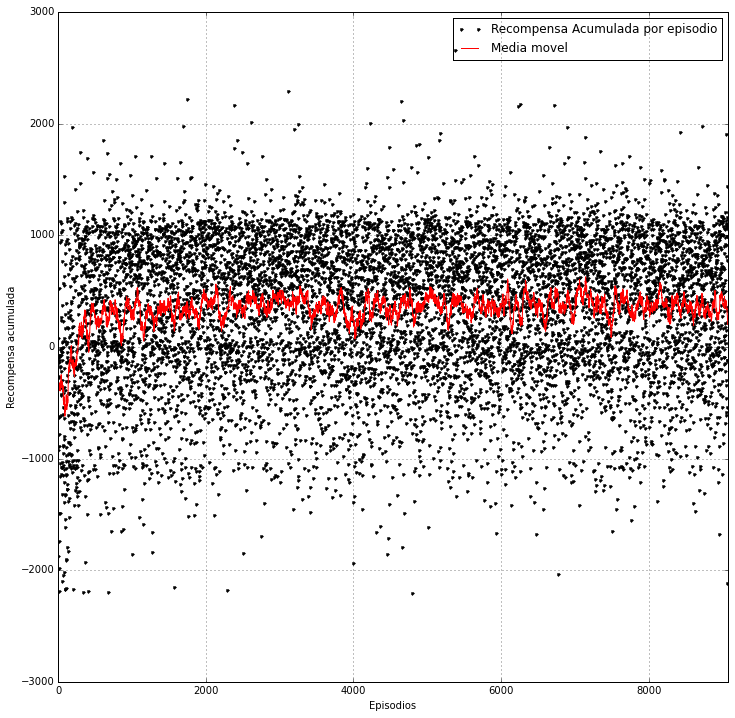

In [11]:
x = amostra4[:,0]
y = amostra4[:,1]

print(y.max())

plt.figure(figsize=(12, 12))
plt.plot(x,y,"k.", label='Recompensa Acumulada por episodio')
plt.legend()
y_av = movingaverage(y, 50)
plt.plot(x, y_av,"r", label='Media movel')
plt.legend()
xlim(0,len(amostra4))
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
plt.grid(True)
#show()
plt.savefig('./episodio300.svg')